In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

Рассмотрим матрицу $A$ размера 32х32, задаваемую следующей формулой 
\begin{equation}
A_{ij} = - \delta_{i,j} + \delta_{i,j-1} + \delta_{i,j-2}
\end{equation}

 Матрица имеет верхнетреугольный вид, поэтому спектр может состоять собственное число может равняться только $\lambda = -1$. $Rg(A-\lambda E) = 31$, значит существует одномерное собственное подпространство, натянутое на вектор $h = [0,0,0,...,0,1]^T$

 Используя функцию scipy.linalg.expm, построим $||e^{At}||_2$ как функцию $t$ на интервале $0 \leq t \leq 50$.

[[-1.  1.  1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  1.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


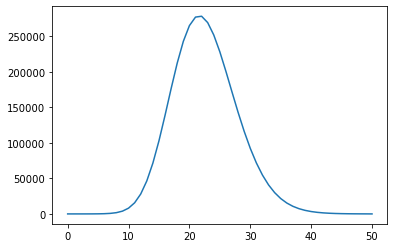

In [3]:
# 1,2 пункты 

from scipy.linalg import expm
#Задаем единичную наддиагональ B
B = np.zeros((32,32))
for i in range (31):
   B[i,i+1]=1
 
A = -np.eye(32) + B + B@B
#Печатаем матрицу A
print(A)
 
### Собственные числа с учетом алгебраической кратностью. Заметим, что геометрическая кратность - 1
L = LA.eigvalsh(A)
print(L)


norms = np.zeros(51)
for t in range(50):
   norms[t]=LA.norm(expm(A*t), ord=2)

plt.plot(np.arange(51),norms)